In [1]:
import os
import numpy as np
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

2025-04-14 18:54:03.740001: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744656844.073007      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744656844.155621      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Define the path to your dataset
dataset_directory = '/kaggle/input/dagm-2007-competition-dataset-optical-inspection/DAGM_KaggleUpload'

In [3]:
# Setting up parameters
img_width, img_height = 150, 150  
batch_size = 32

In [4]:
# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


In [5]:
# Train & Validation Generation
train_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 14560 images belonging to 10 classes.
Found 3640 images belonging to 10 classes.


In [6]:
#MODEL ARCHITECTURE
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-14 18:54:33.640047: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
# Callbacks for early stopping and learning rate reduction
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1)
]

In [9]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,  # More epochs for better convergence
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=callbacks
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


455/455 ━━━━━━━━━━━━━━━━━━━━ 721s 2s/step - accuracy: 0.1463 - loss: -2804829.5000 - val_accuracy: 0.1433 - val_loss: -6037354.5000 - learning_rate: 0.0010
Epoch 2/30


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0833 - val_loss: -6091421.5000 - learning_rate: 0.0010
Epoch 3/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 681s 1s/step - accuracy: 0.1434 - loss: -82783560.0000 - val_accuracy: 0.1413 - val_loss: -250114992.0000 - learning_rate: 0.0010
Epoch 4/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: -198615296.0000 - learning_rate: 0.0010
Epoch 5/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 683s 1s/step - accuracy: 0.1399 - loss: -439133376.0000 - val_accuracy: 0.1427 - val_loss: -799160704.0000 - learning_rate: 0.0010
Epoch 6/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1667 - val_loss: -822205696.0000 - learning_rate: 0.0010
Epoch 7/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 687s 2s/step - accuracy: 0.1377 - loss: -1237358976.0000 - val_accuracy: 0.1430 - val_loss: -2274040576.0000 - learning_r

In [10]:
#Save the model
keras.saving.save_model(model, 'class1.keras')

In [11]:
# Path to saved model
model_path = r"class1.keras"
model = load_model(model_path)

In [12]:
# Evaluate the model on validation set
validation_generator.reset()
model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)


113/113 ━━━━━━━━━━━━━━━━━━━━ 56s 489ms/step - accuracy: 0.1398 - loss: -34315880448.0000


[-34522435584.0, 0.14242257177829742]

In [13]:
#Plot accuracy and loss over epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

<Figure size 640x480 with 0 Axes>

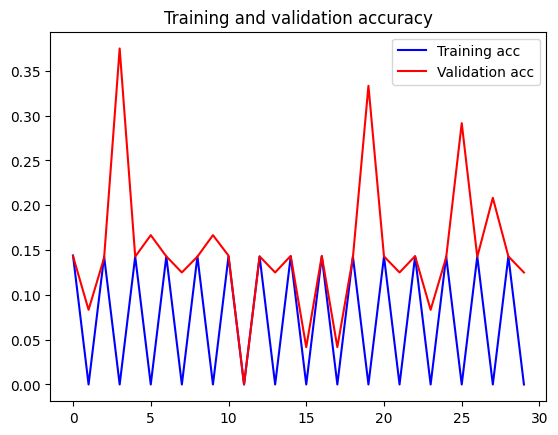

<Figure size 640x480 with 0 Axes>

In [14]:
# Plot accuracy
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

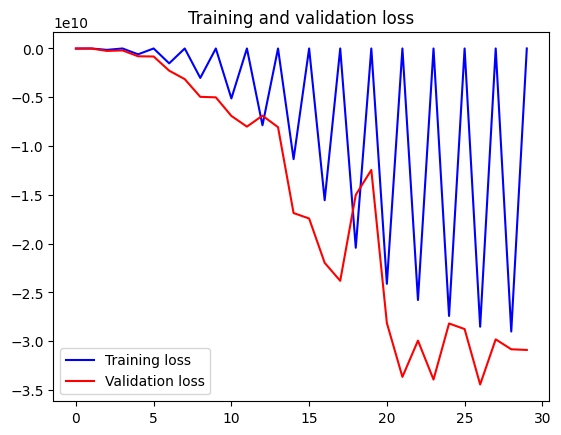

In [15]:
# Plot loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()